### A Regression Model for Wages

This homework assignment works through creating a regression model to predict the wage of an individual given some basic demographic information.  The dataset is from the openml data repository and was culled from Census data -- see information [here](https://www.openml.org/search?type=data&sort=runs&id=534&status=active).  

In [1]:
from sklearn.datasets import fetch_openml

In [2]:
survey = fetch_openml(data_id=534, as_frame=True)

In [3]:
df = survey.frame
df.head()

,EDUCATION,SOUTH,SEX,EXPERIENCE,UNION,WAGE,AGE,RACE,OCCUPATION,SECTOR,MARR
0,8.0,no,female,21.0,not_member,5.10,35.0,Hispanic,Other,Manufacturing,Married
1,9.0,no,female,42.0,not_member,4.95,57.0,White,Other,Manufacturing,Married
2,12.0,no,male,1.0,not_member,6.67,19.0,White,Other,Manufacturing,Unmarried
3,12.0,no,male,4.0,not_member,4.00,22.0,White,Other,Other,Unmarried
4,12.0,no,male,17.0,not_member,7.50,35.0,White,Other,Other,Married


**PROBLEM 1: Splitting the data.**

Use the `train_test_split` function to create a train and test dataset for all features and the target column `WAGE`.  Your test set should be comprised of 20% of the total data.

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('WAGE', axis = 1), df['WAGE'])

**PROBLEM 2: Checking Assumptions**

One assumption of the Linear Regression model is that the target feature is roughly normally distributed.  Is this assumption met?  If yes move on, if no consider transforming the target using `np.log` and compare the distribution of the logarithm of wages.  If the logarithm is more "normal", use this as your target.

In [9]:
import matplotlib.pyplot as plt
import numpy as np

(array([102., 158.,  87.,  26.,  16.,  10.,   0.,   0.,   0.,   1.]),
 array([ 1.  ,  5.35,  9.7 , 14.05, 18.4 , 22.75, 27.1 , 31.45, 35.8 ,
        40.15, 44.5 ]),
 <BarContainer object of 10 artists>)

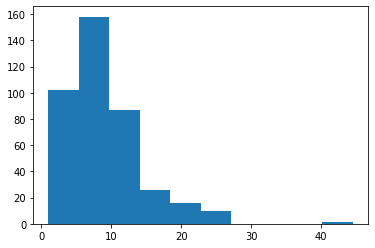

In [10]:
plt.hist(y_train)

(array([ 1.,  2.,  3., 65., 92., 98., 87., 35., 16.,  1.]),
 array([0.        , 0.37954892, 0.75909784, 1.13864676, 1.51819568,
        1.89774459, 2.27729351, 2.65684243, 3.03639135, 3.41594027,
        3.79548919]),
 <BarContainer object of 10 artists>)

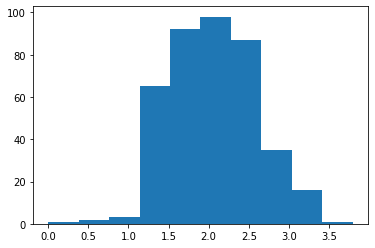

In [11]:
plt.hist(np.log(y_train))

**PROBLEM 3: Preparing the Data**

For the categorical features, use the `OneHotEncoder` to encode the different categorical variables and eliminate any reduntant information using the `drop = 'if_binary'` argument.

In [13]:
from sklearn.preprocessing import OneHotEncoder

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534 entries, 0 to 533
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   EDUCATION   534 non-null    float64 
 1   SOUTH       534 non-null    category
 2   SEX         534 non-null    category
 3   EXPERIENCE  534 non-null    float64 
 4   UNION       534 non-null    category
 5   WAGE        534 non-null    float64 
 6   AGE         534 non-null    float64 
 7   RACE        534 non-null    category
 8   OCCUPATION  534 non-null    category
 9   SECTOR      534 non-null    category
 10  MARR        534 non-null    category
dtypes: category(7), float64(4)
memory usage: 21.4 KB


In [14]:
ohe = OneHotEncoder(drop = 'first')
ohe.fit_transform(df.select_dtypes('category'))

<534x13 sparse matrix of type '<class 'numpy.float64'>'
	with 2521 stored elements in Compressed Sparse Row format>

**PROBLEM 4: Using `make_column_transformer`**

Rather than taking just the categorical features, transforming these, and merging the dummied data with the other numeric features -- `make_column_transformer` will accomplish this for us.  Look over the user guide [here](https://scikit-learn.org/stable/modules/compose.html#make-column-transformer) and use this to transform the categorical features with `OneHotEncoder` and leave the remaining features as is.  Be sure to transform both your training and test datasets correctly and assign as `X_train_encoded` and `X_test_encoded` below.

In [15]:
from sklearn.compose import make_column_transformer

In [27]:
encoder = make_column_transformer((ohe, list(df.select_dtypes('category').columns)),
                                 remainder = 'passthrough', verbose_feature_names_out=False)

In [28]:
X_train_encoded = encoder.fit_transform(X_train)
X_test_encoded = encoder.transform(X_test)

**PROBLEM 5: Building the model**

Now that your data is prepared, build a regression model with the appropriate input and target values.  

In [29]:
y_train_log = np.log(y_train)
y_test_log = np.log(y_test)

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
lr = LinearRegression()
lr.fit(X_train_encoded, y_train_log)

LinearRegression()

**PROBLEM 6: Scoring the Model**

Now, evaluate the **Mean Squared Error** of your model on both the train and test data.  Compare this with a baseline prediction **Mean Squared Error**.  Did you model perform better than the baseline?

In [32]:
from sklearn.metrics import mean_squared_error

In [33]:
baseline_preds = np.mean(y_train_log)*np.ones(shape = (len(y_train),))

In [34]:
mean_squared_error(y_train_log, baseline_preds)

0.29110079518592435

In [35]:
mean_squared_error(y_train_log, lr.predict(X_train_encoded))

0.1873066762221497

In [36]:
mean_squared_error(y_test_log, lr.predict(X_test_encoded))

0.15155513078311686

**PROBLEM 7: Interpreting Coefficients**

Examine your coefficients for the model.  Using complete sentences explain which of the features seem to lead to increases in wages, and which seem to lead to a decrease in wage.

In [37]:
import pandas as pd

In [38]:
coef_df = pd.DataFrame({'coefs': lr.coef_, 'feature': encoder.get_feature_names_out()})

In [39]:
coef_df.sort_values('coefs').head()

,coefs,feature
8,-0.205840,OCCUPATION_Sales
2,-0.205777,UNION_not_member
9,-0.180351,OCCUPATION_Service
6,-0.107502,OCCUPATION_Other
0,-0.104753,SOUTH_yes


In [40]:
coef_df.sort_values('coefs').tail()

,coefs,feature
4,0.117617,RACE_White
13,0.124890,EDUCATION
5,0.142785,OCCUPATION_Management
7,0.152705,OCCUPATION_Professional
1,0.254920,SEX_male


**PROBLEM 8: Polynomial Features**

After building a basic model using all the features, compare this to a model using a quadratic polynomial.  Use `PolynomialFeatures` to create the features and score the train and test data as before.  Did this model perform better than the baseline or linear model?

In [41]:
from sklearn.preprocessing import PolynomialFeatures

In [42]:
polys = PolynomialFeatures()

In [43]:
X_train_poly = polys.fit_transform(X_train_encoded)
X_test_poly = polys.transform(X_test_encoded)

In [44]:
lr2 = LinearRegression()

In [46]:
lr2.fit(X_train_poly, y_train_log)

LinearRegression()

In [47]:
preds = lr2.predict(X_test_poly)

In [49]:
mean_squared_error(y_test_log, preds)

0.26472979986233

**PROBLEM 9: Feature Selection**

One of the downsides to the polynomial features is how many new features are introduced into the model.  To limit this, you can use *Feature Selection* once the polynomial terms have been generated.  Explore the `feature_selection` module [here](https://scikit-learn.org/stable/modules/feature_selection.html) and use a feature selector to limit the polynomial features to the 15 "most important" features.  Which of the features were selected?

In [50]:
from sklearn.feature_selection import SelectKBest

In [53]:
selector = SelectKBest(k = 15)
X_train_selected = selector.fit_transform(X_train_poly, y_train_log)
X_test_selected = selector.transform(X_test_poly)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [  0  63  88  89  90  91  99 100 101 109 110 118 133] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [55]:
lr3 = LinearRegression()
lr3.fit(X_train_selected, y_train_log)

LinearRegression()

In [57]:
mean_squared_error(y_test_log, lr3.predict(X_test_selected))

0.21676966072060874

**PROBLEM 10: Streamlining the Process**

Conducting transformations and feeding the results of the transformation into a model is such a common task that `sklearn` has built in functions to combine the *Transformers* with the *Estimators*.  Look over the `Pipeline` user guide [here](https://scikit-learn.org/stable/modules/compose.html#pipeline) and build a pipeline that:

- Encodes categorical features
- Adds polynomial features
- Selects top 15 features from polynomial features
- Builds a regression model using the 15 features and the logarithm of the target

Fit the pipeline to the training data and evaluate it on both the train and test data.

In [58]:
from sklearn.pipeline import Pipeline

In [59]:
pipe = Pipeline([('encoder', encoder),
                ('poly', polys),
                ('select', selector),
                ('model', lr)])

In [60]:
pipe.fit(X_train, y_train_log)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [  0  63  88  89  90  91  99 100 101 109 110 118 133] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


Pipeline(steps=[('encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='first'),
                                                  ['SOUTH', 'SEX', 'UNION',
                                                   'RACE', 'OCCUPATION',
                                                   'SECTOR', 'MARR'])],
                                   verbose_feature_names_out=False)),
                ('poly', PolynomialFeatures()), ('select', SelectKBest(k=15)),
                ('model', LinearRegression())])

In [61]:
train_preds = pipe.predict(X_train)
test_preds = pipe.predict(X_test)

In [62]:
mean_squared_error(y_train_log, train_preds)

0.24128612875941535

In [63]:
mean_squared_error(y_test_log, test_preds)

0.21676966072060874